# TOF data
Data taken at intervals of $T=0.1ms$, where $T$ represents the period of free flight after trapping. Captured in sequences of 10 ranging from 0.1ms to 1.0ms. 

In [2]:
import os
import datarun
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt

In [3]:
d = datarun.Experiment(
    vstart = .1,
    vend = 1.0,
    vstep = .1, 
    idx_start = 11,
    datapath = os.path.join(os.getcwd(),'mar02'),
    numtrials = 10,
    mask=0.25
)

on 0: /Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun.py:161: RuntimeWarning: divide by zero encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))
/Users/Ruobin/Desktop/YALE/Spring2023/PHYS382L/MOTsArentForKids/datarun.py:161: RuntimeWarning: invalid value encountered in true_divide
        od_arr = np.log(np.divide(I_arr, I0_arr))


|████████████████████████████████████████| 100/100 [100%] in 2:08.9 (0.77/s)                                            


In [ ]:
sigma_times = d.structure_data(lambda d : d.popt_y[2]**2)

removed_count = 0
for key in sigma_times:
    sigma = np.std(sigma_times[key]) 
    mean = np.mean(sigma_times[key])
    for val in sigma_times[key]:
        if np.abs(val-mean) > 2*sigma:
            sigma_times[key].remove(val)
            print(key, val)

means = [np.mean(arr) for arr in sigma_times.values()]
errs = [np.std(arr) for arr in sigma_times.values()]
time_list = np.array(list(sigma_times.keys()))
popt, pcov = curve_fit(lambda x,a,b:a*x**2+b, d.vlist, means, sigma=errs)
print(popt)
verr=np.sqrt(pcov[0][0])
verr

In [ ]:
scale = 1e3
plt.errorbar(np.array(list((sigma_times.keys())))**2, scale**2*np.array(means), yerr = np.array(errs)*scale**2, linestyle = "None", c = 'r', capsize=10, marker = "x", label = "expt.")
for time, arr in sigma_times.items():
    for val in arr:
        plt.scatter(time**2, scale**2*val, c="k", marker = ".")

xaxis = np.linspace(min(d.vlist), max(d.vlist), 100)
plt.plot(xaxis**2, scale**2*(popt[0]*xaxis**2+popt[1]), c="b", label = r"$\langle v_x^2\rangle t^2+\sigma_x^2(0)$")

plt.xlabel(r"$t^2 \ (ms^2)$")
plt.ylabel(r"$\sigma_x^2 \ (mm^2)$")
plt.gcf().set_dpi(300)
plt.legend(loc='lower right')

## Check for atom loss

In [ ]:
sigma_times = d.structure_data(lambda d : d.atom_number())

removed_count = 0
for key in sigma_times:
    sigma = np.std(sigma_times[key]) 
    mean = np.mean(sigma_times[key])
    for val in sigma_times[key]:
        if np.abs(val-mean) > 2*sigma:
            sigma_times[key].remove(val)
            print(key, val)

means = [np.mean(arr) for arr in sigma_times.values()]
errs = [np.std(arr) for arr in sigma_times.values()]
time_list = np.array(list(sigma_times.keys()))

fig,ax=plt.subplots(dpi=300)
for time, arr in sigma_times.items():
    ax.plot([time]*len(arr), np.array(arr)/100000, '.k',markersize=10)
ax.plot(np.array(list(sigma_times.keys())), np.array(means)/100000,'rx',linewidth=10)
(_, caps, _)=ax.errorbar(np.array(list(sigma_times.keys())), np.array(means)/100000, yerr = np.array(errs)/100000, linestyle = "None", c = 'r', capsize=10, marker = "x", linewidth=3, label = "mean", markersize=10)
for cap in caps:
    cap.set_markeredgewidth(3)

ax.set_ylabel(r'N (dim.) ($10^6$)',fontsize=24)
ax.set_xlabel(r'$t$ (ms)',fontsize=24)
ax.legend(prop={'size':24})
ax.tick_params(labelsize=24,which='both')


In [ ]:
p=[]
for key in range(2,11):
    key/=10
    bootstrap=[]
    for i in range(10000):
        means1=np.mean(np.random.choice(sigma_times[0.1],size=5,replace=True))
        means2=np.mean(np.random.choice(sigma_times[1],size=5,replace=True))
        bootstrap.append(means1-means2)
    len(bootstrap)
    p.append(np.mean(np.array(bootstrap)<0))
p

## Size by RMS

0.6 1.431626428036809e-08
1.0 1.5254877476405823e-08
[2.14514653e-09 1.39339722e-08]


array([2.14514653e-09, 1.39339722e-08])

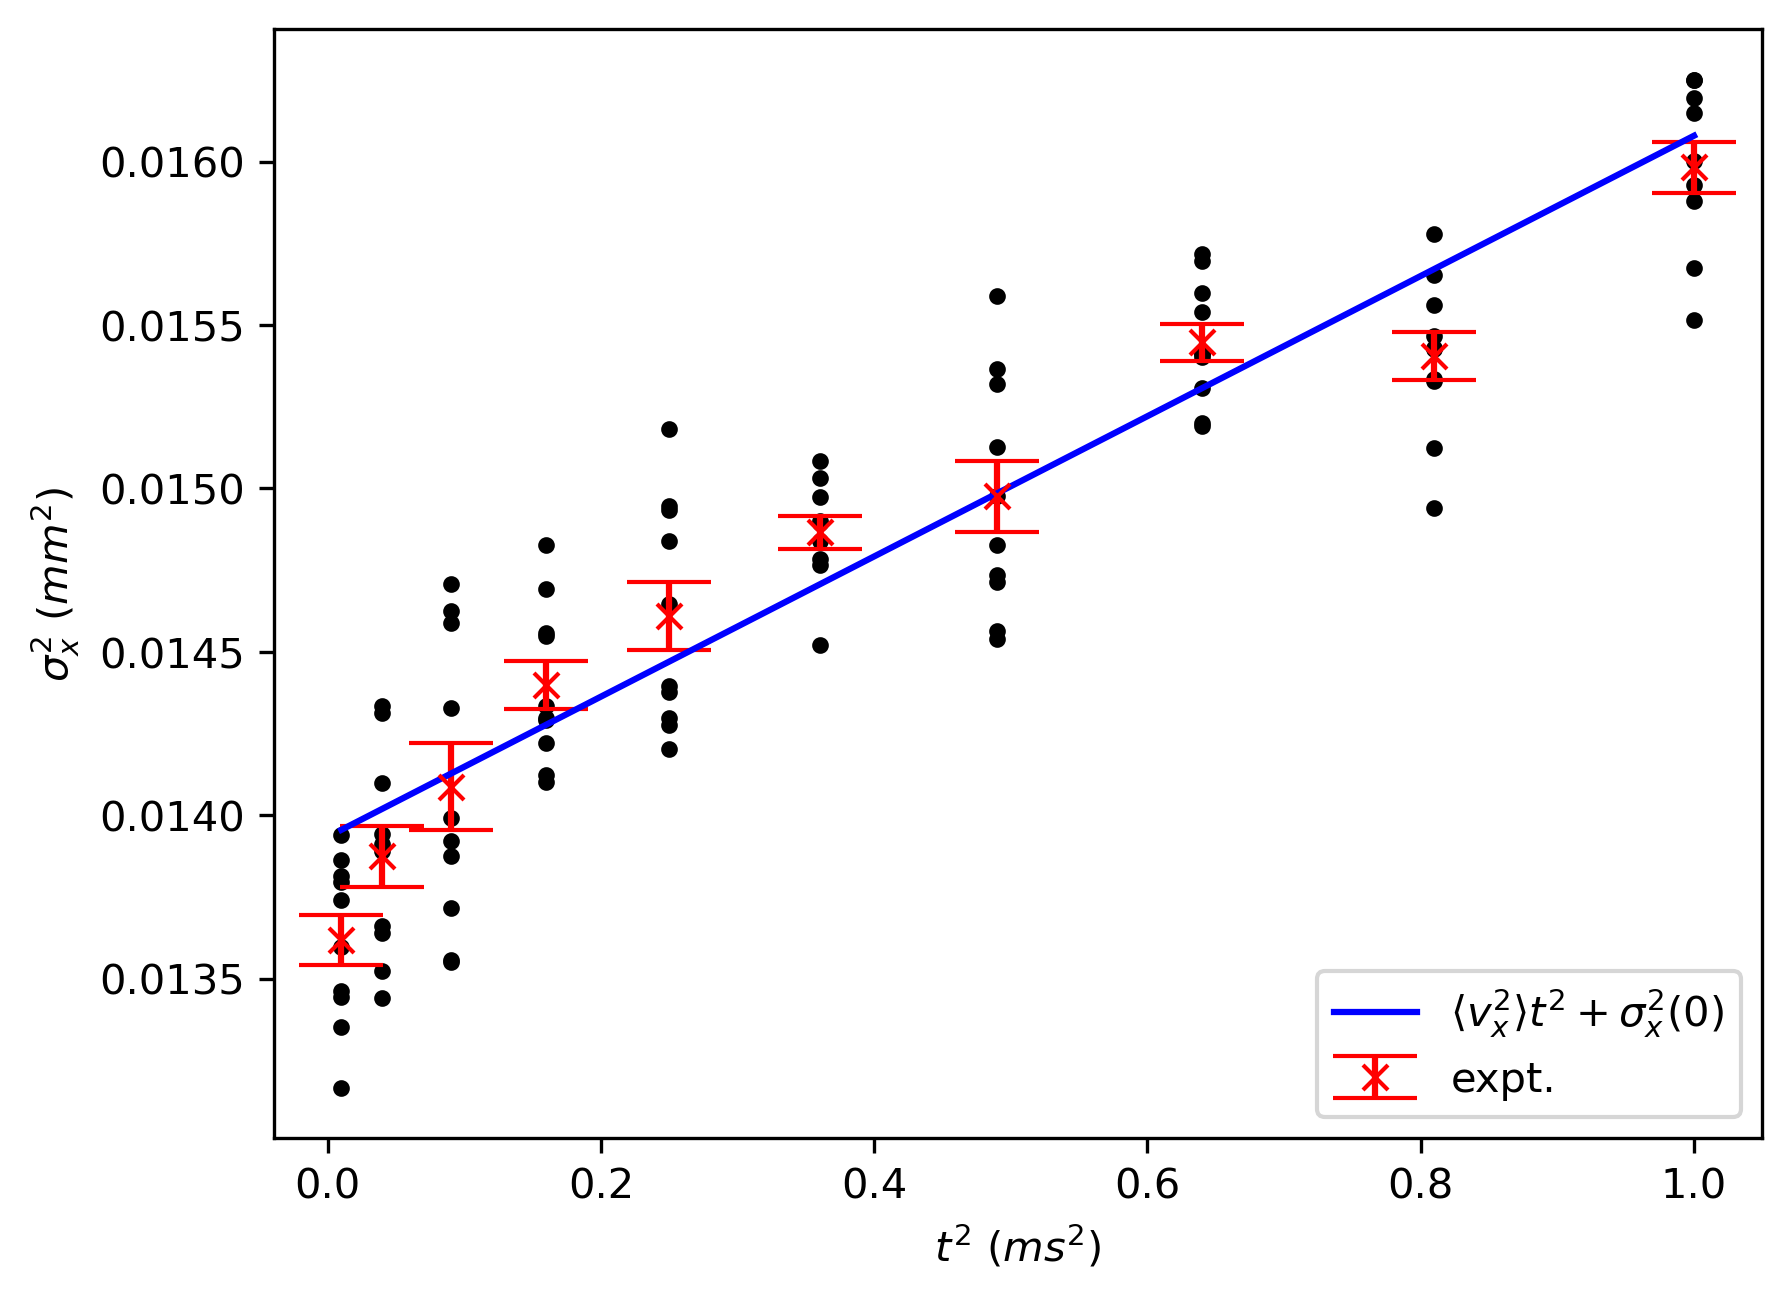

In [6]:
sigma_times = d.structure_data(lambda d : d.sigma_x_sq)

removed_count = 0
for key in sigma_times:
    sigma = np.std(sigma_times[key]) 
    mean = np.mean(sigma_times[key])
    for val in sigma_times[key]:
        if np.abs(val-mean) > 2*sigma:
            sigma_times[key].remove(val)
            print(key, val)

means = [np.mean(arr) for arr in sigma_times.values()]
errs = [np.std(arr) for arr in sigma_times.values()]
time_list = np.array(list(sigma_times.keys()))
popt, pcov = curve_fit(lambda x,a,b:a*x**2+b, d.vlist, means, sigma=errs)
print(popt)
verr=np.sqrt(pcov[0][0])
verr

scale = 1e3
plt.errorbar(np.array(list((sigma_times.keys())))**2, scale**2*np.array(means), yerr = np.array(errs)*scale**2/np.sqrt(10), linestyle = "None", c = 'r', capsize=10, marker = "x", label = "expt.")
for time, arr in sigma_times.items():
    for val in arr:
        plt.scatter(time**2, scale**2*val, c="k", marker = ".")

xaxis = np.linspace(min(d.vlist), max(d.vlist), 100)
plt.plot(xaxis**2, scale**2*(popt[0]*xaxis**2+popt[1]), c="b", label = r"$\langle v_x^2\rangle t^2+\sigma_x^2(0)$")

plt.xlabel(r"$t^2 \ (ms^2)$")
plt.ylabel(r"$\sigma_x^2 \ (mm^2)$")
plt.gcf().set_dpi(300)
plt.legend(loc='lower right')

popt



In [ ]:
v_rms = np.sqrt(popt[0])*1e3*np.sqrt(3)
v_err = np.mean(errs)*3*1e6/(np.sqrt(9))*3

First, we have $\langle (x+vt)^2 \rangle = \langle x^2 \rangle + \langle v^2\rangle t^2$, using $\langle v \rangle = 0$, and thus the fit parameter $a$ gives the RMS velocity. Plugging this into the Maxwell-Bolzmann distribution,
$$
v_{rms} = \sqrt{\frac{3RT}{M}} \Rightarrow T = \frac{v_{rms}^2 M}{3R}
$$

In [ ]:
v_rms**2*39.1/(3*8.315)*1e3

In [ ]:
v_err*39.1/(3*8.315)*1e3

In [ ]:
v_rms

In [ ]:
v_err/v_rms

In [ ]:
v_err/(2*np.sqrt(v_rms))

In [ ]:
v_err